<a href="https://colab.research.google.com/github/youngIcom/Machine_Learning_Project/blob/main/Latihan_ML_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
data = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/RFM_customer.csv')
data.head()

,customer_id,frequency,recency,monetary
0,12346,1,48,27904840000
1,12347,2,40,423420000
2,12348,2,41,414092000
3,12350,1,33,119478000
4,12352,3,6,449984000


## memeriksa dimensi dataframe

In [5]:
data.shape
print(f"dataset ini memiliki {data.shape[0]} baris dan {data.shape[1]} kolom")

dataset ini memiliki 1625 baris dan 4 kolom


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1625 entries, 0 to 1624
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  1625 non-null   int64
 1   frequency    1625 non-null   int64
 2   recency      1625 non-null   int64
 3   monetary     1625 non-null   int64
dtypes: int64(4)
memory usage: 50.9 KB


In [7]:
data.describe()

,customer_id,frequency,recency,monetary
count,1625.000000,1625.000000,1625.000000,1.625000e+03
mean,15261.415385,1.910769,36.455385,3.321584e+08
std,1745.556403,2.111145,26.934570,1.140958e+09
min,12346.000000,1.000000,1.000000,3.100000e+05
25%,13764.000000,1.000000,13.000000,7.520200e+07
50%,15221.000000,1.000000,32.000000,1.380670e+08
75%,16805.000000,2.000000,54.000000,2.902490e+08
max,18283.000000,34.000000,90.000000,2.790484e+10


In [10]:
# memeriksa apakah ada data kosong
data.isnull().sum()

,0
customer_id,0
frequency,0
recency,0
monetary,0


In [12]:
print(data.isnull().any().any())

False


## Memubuat kolom customer_id karena tidak relevan dengan klustering nantinya

In [14]:
RFM_km = data.drop(['customer_id'], axis=1)
RFM_km.head()

,frequency,recency,monetary
0,1,48,27904840000
1,2,40,423420000
2,2,41,414092000
3,1,33,119478000
4,3,6,449984000


**Recency** merupakan variabel untuk mengukur waktu terakhir konsumen melakukan transaksi,

**Frequency** merupakan variabel untuk mengukur seberapa sering konsumen melakukan transaksi,

**Monetary** merupakan variabel untuk mengukur jumlah transaksi dari setiap konsumen.

## Memeriksa Outlier pada setiap kolom

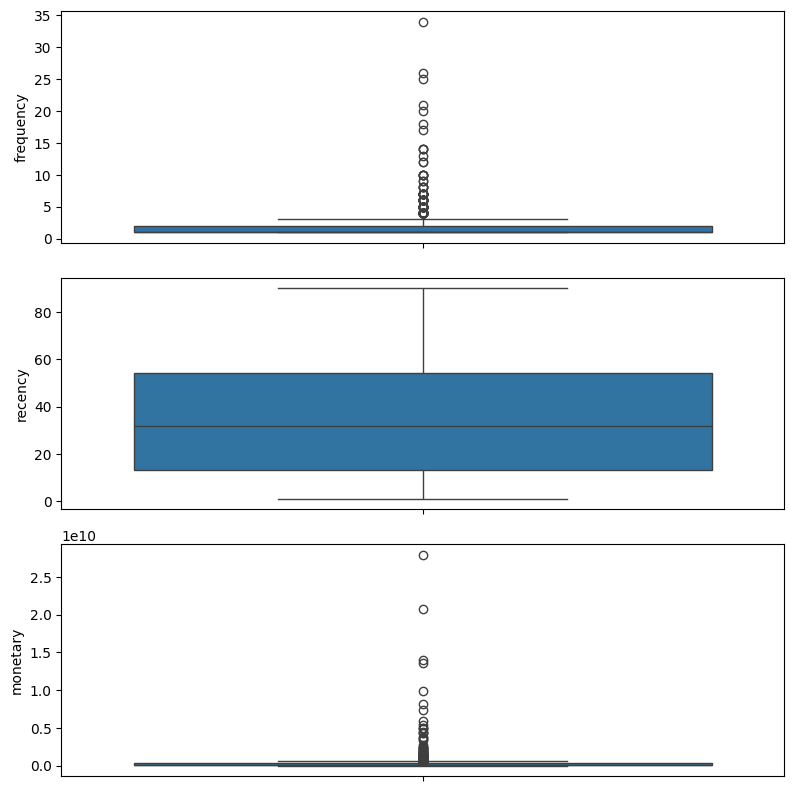

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(3, 1, figsize=(8, 8))
sns.boxplot(RFM_km['frequency'], ax=ax[0])
sns.boxplot(RFM_km['recency'], ax=ax[1])
sns.boxplot(RFM_km['monetary'], ax=ax[2])
plt.tight_layout()
plt.show()

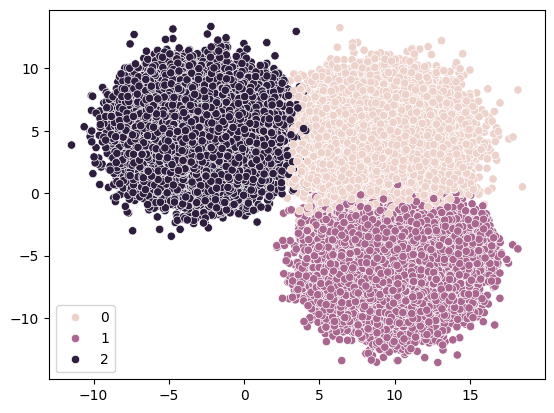

In [27]:
#Import make blobs agar dapat membuat sample data untuk clustering
from sklearn.datasets import make_blobs

#Features menyimpan numpy array 2 dimensi, true tabel berisikan label cluster dari setiap data
#Make_blobs digunakan untuk membuat sample data secara acak
features, true_labels = make_blobs(n_samples=200000, centers=3, cluster_std=2, random_state=24)

#Untuk melihat sampel data ini (features dan label sebenarnya) dapat divisualisasikan ke dalam scatter plot

#Import library seaborn dan matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

#Plotkan features yang telah dibuat dengan make_blobs dan bedakan warna dari 3 kelompok cluster data asal
sns.scatterplot(x=features[:,0], y=features[:,1], hue=true_labels)
plt.legend(loc="lower left")
plt.show()

In [30]:
# Melakukan standarisasi data
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
RFM_standarized = standard_scaler.fit_transform(RFM_km)
RFM_standarized = pd.DataFrame(RFM_standarized)
RFM_standarized.columns = ['frequency', 'monetary', 'recency']
RFM_standarized.head()

,frequency,monetary,recency
0,-0.431543,0.428749,24.173698
1,0.042280,0.131641,0.080011
2,0.042280,0.168780,0.071833
3,-0.431543,-0.128328,-0.186463
4,0.516102,-1.131065,0.103301


## Menampilkan box plot

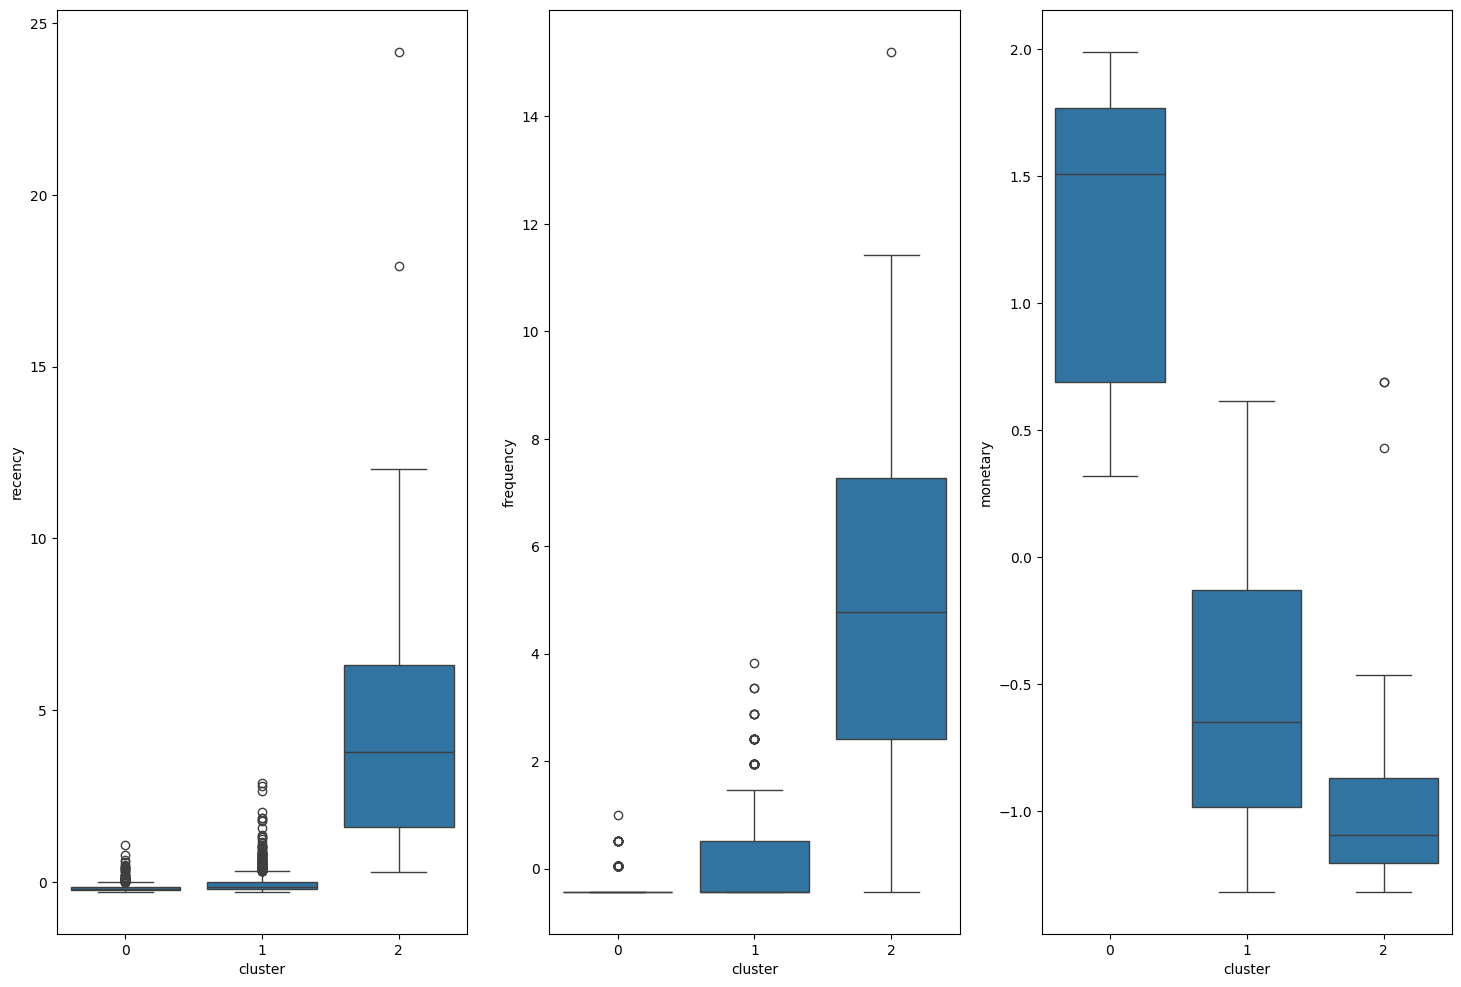

In [35]:
from sklearn.cluster import KMeans

#Mengatur parameter k-means, jumlah cluster yang akan dibentuk adalah 3
k_means = KMeans(n_clusters=3, random_state=0)
k_means.fit(RFM_standarized)

#Pred menyimpan hasil prediksi label cluster untuk setiap data
pred = k_means.predict(RFM_standarized)

#Menggabungkan RFM dan hasil label clustering
RFM_labeled = pd.concat([RFM_standarized, pd.Series(pred).rename("cluster")], axis=1)

#Import library matplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1,3, figsize=(18,12))

#Menampilkan hasil clustering untuk setiap data dalam bentuk boxplot
sns.boxplot(x="cluster", y="recency", data=RFM_labeled, ax=ax[0])
sns.boxplot(x="cluster", y="frequency", data=RFM_labeled, ax=ax[1])
sns.boxplot(x="cluster", y="monetary", data=RFM_labeled, ax=ax[2])
plt.show()

## Implementasi Elbow Method

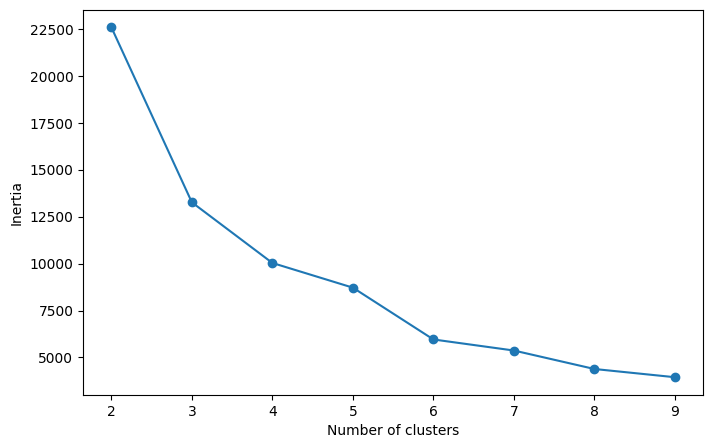

In [2]:
#Import library pandas
import pandas as pd
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/RFM_customer.csv", encoding='utf8')

#Drop kolom customer_id
RFM_km = data.drop(["customer_id"], axis=1)

#Penerapan RobustScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
RFM_robust = robust_scaler.fit_transform(RFM_km)
RFM_robust = pd.DataFrame(RFM_robust)
RFM_robust.columns = ["Frequency","Recency","Monetary"]

#Import library Kmeans
from sklearn.cluster import KMeans

#Membuat variable SSE untuk menampung nilai WSS dari setiap nilai k
SSE = []

#Melakukan k-means berulang dengan nilai k yang berbeda-beda dari 2 sampai 10
for k in range(2, 10):
    k_means = KMeans(n_clusters=k, random_state=0)
    model = k_means.fit(RFM_robust)
    SSE.append(k_means.inertia_)

#Mengkonversi hasil ke dalam data frame, kemudian menampilkannya dalam bentuk plot
import matplotlib.pyplot as plt
frame = pd.DataFrame({"Cluster":range(2,10), "SSE":SSE})
plt.figure(figsize=(8,5))
plt.plot(frame["Cluster"], frame["SSE"], marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

## Visualisasi Silhouette Score

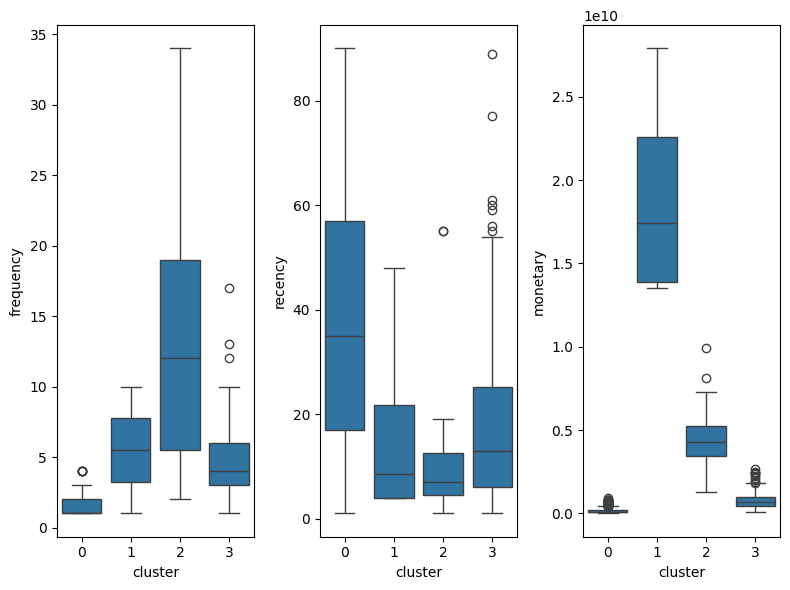

In [1]:
#Import library pandas
import pandas as pd
data = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/RFM_customer.csv", encoding='utf8')

#Drop kolom customer_id
RFM_km = data.drop(["customer_id"], axis=1)

#Penerapan RobustScaler
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
RFM_robust = robust_scaler.fit_transform(RFM_km)
RFM_robust = pd.DataFrame(RFM_robust)
RFM_robust.columns = ["Frequency","Recency","Monetary"]

#Import KMeans & silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Menjalankan k-means dengan nilai k = 4
k_means = KMeans(n_clusters=4, random_state=0)
k_means.fit(RFM_robust)

#Pred menyimpan hasil prediksi label cluster untuk setiap data
pred = k_means.predict(RFM_robust)

#Menggabungkan dataframe data dan hasil label clustering
RFM_labeled = pd.concat([data, pd.Series(pred).rename("cluster")], axis=1)

#Import library matplotlib dan seaborn
import matplotlib.pyplot as plt
import seaborn as sns

#Menampilkan boxplot silhouette method
fig, ax = plt.subplots(1, 3, figsize=(8,6))
sns.boxplot(x="cluster", y="frequency", data=RFM_labeled, ax=ax[0])
sns.boxplot(x="cluster", y="recency", data=RFM_labeled, ax=ax[1])
sns.boxplot(x="cluster", y="monetary", data=RFM_labeled, ax=ax[2])
plt.tight_layout()
plt.show()